OUR DATASET COUNT         :  Counter({'No Failure': 9652, 'Heat Dissipation Failure': 112, 'Power Failure': 95, 'Overstrain Failure': 78, 'Tool Wear Failure': 45, 'Random Failures': 18})
OVER SAMPLING DATA COUNT  :  Counter({'No Failure': 9652, 'Power Failure': 9652, 'Tool Wear Failure': 9652, 'Overstrain Failure': 9652, 'Random Failures': 9652, 'Heat Dissipation Failure': 9652})
NUMBER OF TRAIN DATASET    :  46329
NUMBER OF TEST DATASET      :  11583
TOTAL NUMBER OF DATASET    :  57912
NUMBER OF TRAIN DATASET    :  46329
NUMBER OF TEST DATASET      :  11583
TOTAL NUMBER OF DATASET    :  57912
THE CLASSIFICATION REPORT OF COMPLEMENTNB:

                           precision    recall  f1-score   support

Heat Dissipation Failure       0.52      0.33      0.40      1930
              No Failure       0.00      0.00      0.00      1930
      Overstrain Failure       0.40      1.00      0.57      1931
           Power Failure       0.27      0.49      0.35      1931
         Random Failure

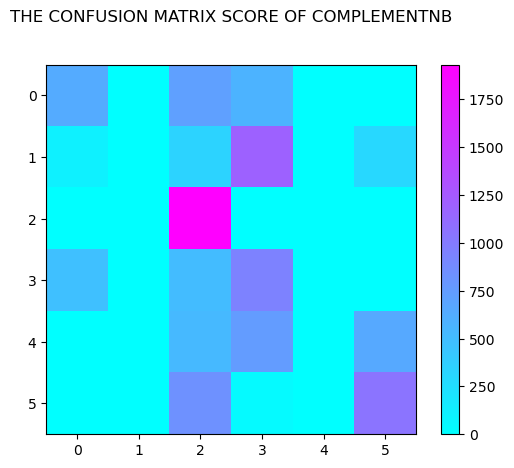

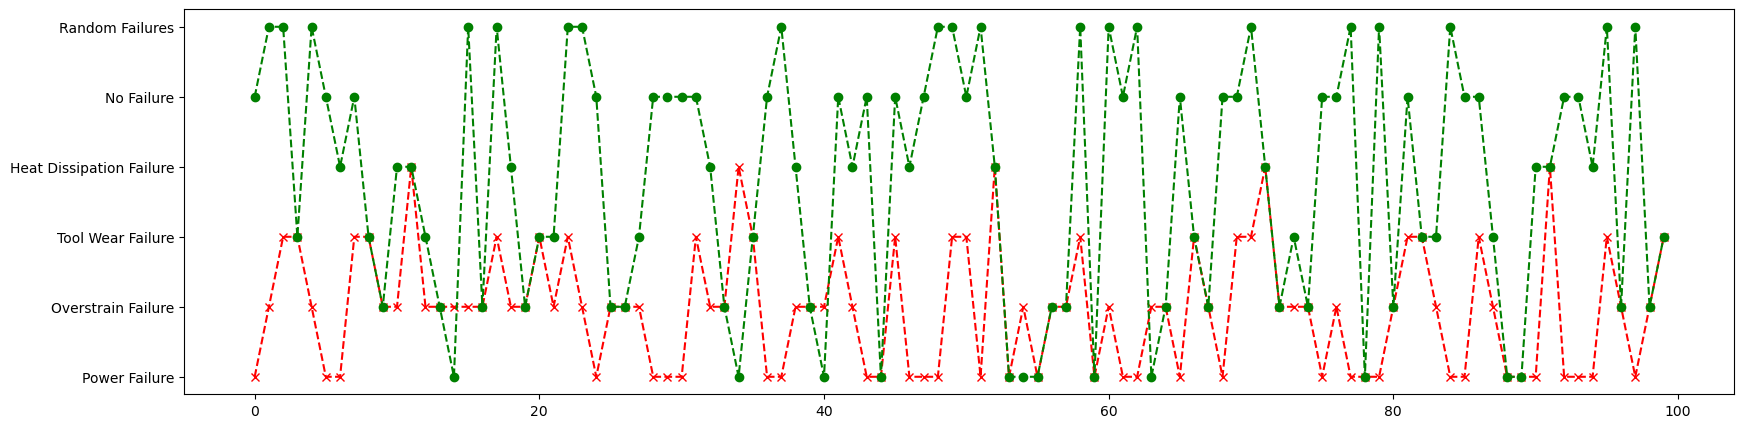

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Air_temperature_K      10000 non-null  float64
 1   Process_temperature_K  10000 non-null  float64
 2   Rotational_speed_rpm   10000 non-null  int64  
 3   Torque_Nm              10000 non-null  float64
 4   Tool_wear_min          10000 non-null  int64  
 5   Failure_Type           10000 non-null  int32  
dtypes: float64(3), int32(1), int64(2)
memory usage: 429.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Air_temperature_K      10000 non-null  float64
 1   Process_temperature_K  10000 non-null  float64
 2   Rotational_speed_rpm   10000 non-null  int64  
 3   Torque_Nm              10000 non-null  floa

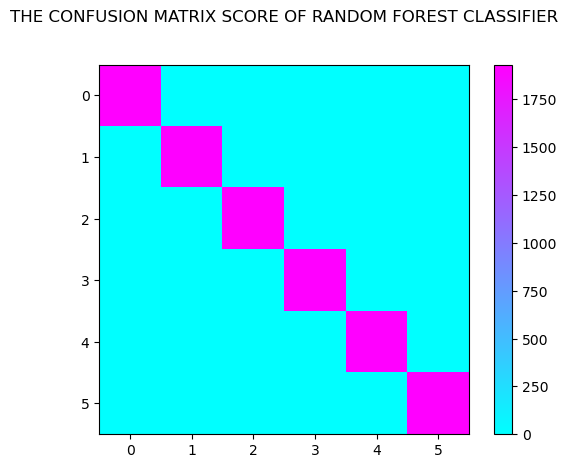

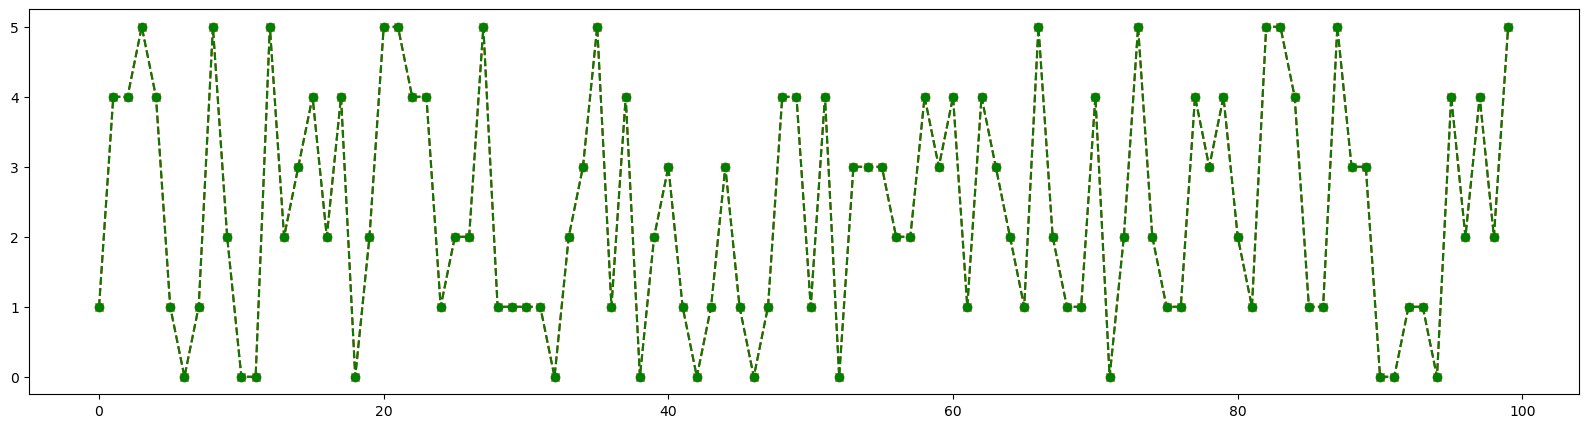

OUR DATASET COUNT         :  Counter({'No Failure': 9652, 'Heat Dissipation Failure': 112, 'Power Failure': 95, 'Overstrain Failure': 78, 'Tool Wear Failure': 45, 'Random Failures': 18})
OVER SAMPLING DATA COUNT  :  Counter({'No Failure': 9652, 'Power Failure': 9652, 'Tool Wear Failure': 9652, 'Overstrain Failure': 9652, 'Random Failures': 9652, 'Heat Dissipation Failure': 9652})
NUMBER OF TRAIN DATASET    :  46329
NUMBER OF TEST DATASET      :  11583
TOTAL NUMBER OF DATASET    :  57912
NUMBER OF TRAIN DATASET    :  46329
NUMBER OF TEST DATASET      :  11583
TOTAL NUMBER OF DATASET    :  57912
THE CLASSIFICATION REPORT OF GradientBoosting:

                           precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00      1930
              No Failure       1.00      0.93      0.96      1930
      Overstrain Failure       0.99      1.00      0.99      1931
           Power Failure       0.99      1.00      1.00      1931
         Random Fai

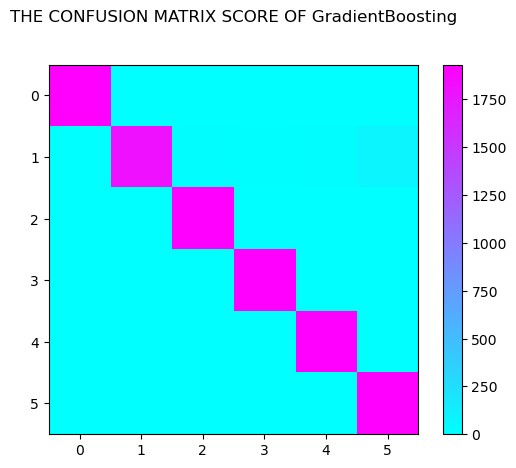

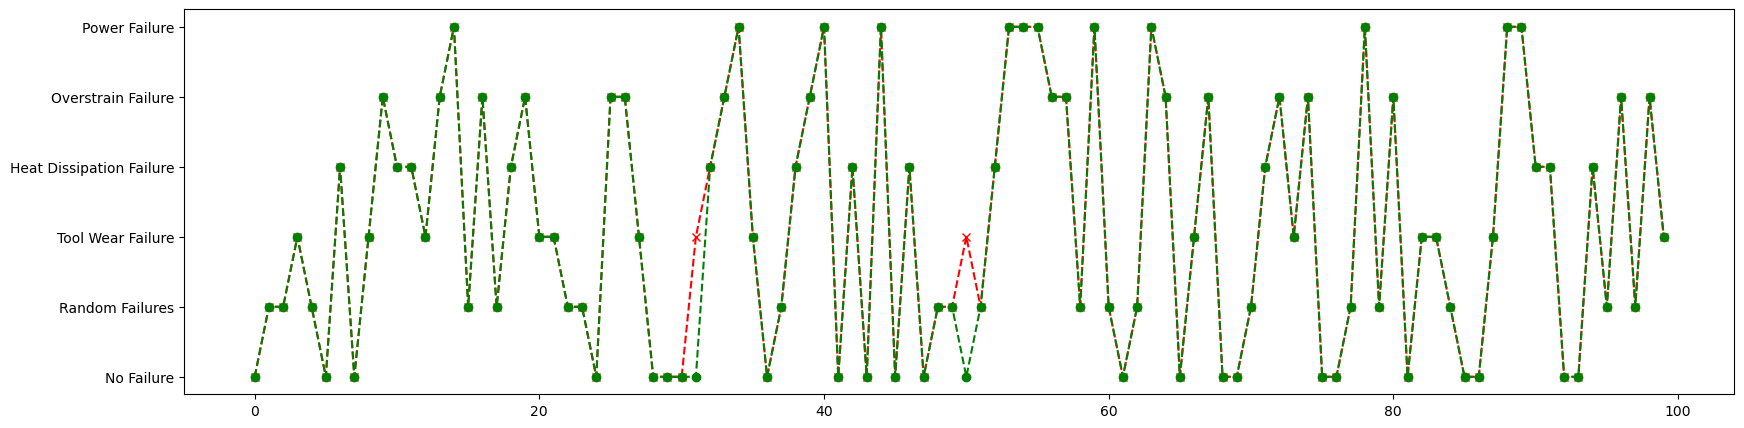

Best model found in notebook: M4-RFC.ipynb
Accuracy: 99.45778736315776


In [4]:
from nbconvert.preprocessors import ExecutePreprocessor
import nbformat
from sklearn.metrics import accuracy_score, hamming_loss

def execute_notebook(notebook_path):
    with open(notebook_path) as f:
        nb = nbformat.read(f, as_version=4)
    ep = ExecutePreprocessor(timeout=600, kernel_name='python3')
    ep.preprocess(nb, {'metadata': {'path': './'}})
    return nb

notebook_paths = ["M3 - CNB.ipynb", "M4-RFC.ipynb", "M5-GBC.ipynb"]

accuracy_scores = []

for path in notebook_paths:
    # Execute the notebook
    nb = execute_notebook(path)
    # Define local scope for executing notebook cells
    local_vars = {}
    # Iterate over each cell in the notebook
    for cell in nb['cells']:
        if cell['cell_type'] == 'code':
            source = ''.join(cell['source'])
            # Execute the code cell
            exec(source, local_vars)
    # Extract accuracy score from local variables
    if 'accuracy' in local_vars:
        accuracy_scores.append((path, local_vars['accuracy'].mean() * 100))

if accuracy_scores:
    best_model = max(accuracy_scores, key=lambda x: x[1])
    print("Best model found in notebook:", best_model[0])
    print("Accuracy:", best_model[1])
else:
    print("No accuracy scores found in the notebooks.")
